# Exercise 3: Data set, augmentation, and baseline

In [2]:
import numpy as np
import pandas as dp
import skimage.io as io
import matplotlib.pyplot as plt


## Load data
In this execercise we will be working with a CT data set from lungs. The image slices are stored in a numpy array and the labels in a pandas data frame. 

__Note:__ Please uncompress the file ```ct_tiles.tif.zip``` before starting.

In [22]:
img = io.imread('ct_tiles.tif')
labels = dp.read_csv('malignancy.csv')
print('Image size: {0},{1},{2}'.format(img.shape[0],img.shape[1],img.shape[2]))
print('Labels {0}'.format(labels.malignancy.count() ))

Image size: 6691,64,64
Labels 6691


Look at the first five labels

In [23]:
labels.head()

,idx,malignancy
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1


Look at the first five slices

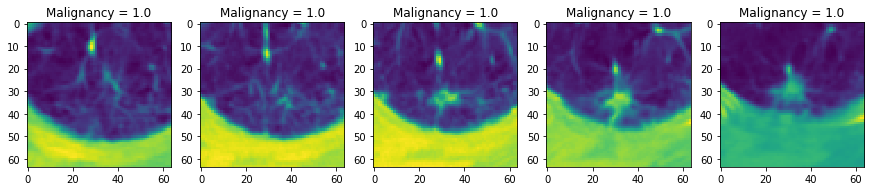

In [12]:
plt.figure(figsize=[15,5])
for idx,tile in enumerate(img[0:5]) :
    plt.subplot(1,5,idx+1)
    plt.imshow(tile) ;
    plt.title('Malignancy = {:0.2}'.format(labels.malignancy[idx]))

## Select images for augmentation
In our exercise we want work one healthy sample (imgA) and one sick sample (imgB)

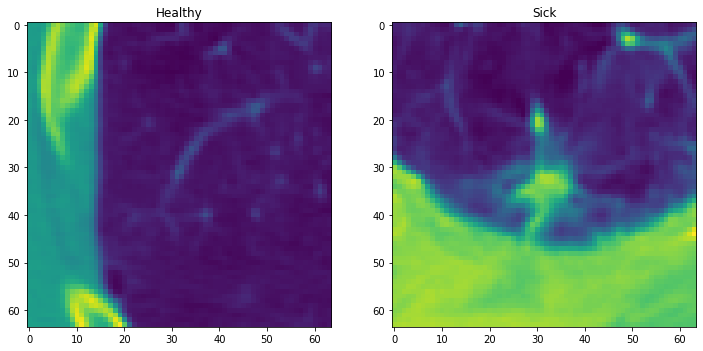

In [44]:
imgA=img[labels[labels.malignancy==0.0].idx.iloc[3]]
imgB=img[labels[labels.malignancy==1.0].idx.iloc[3]]
plt.figure(figsize=[12,7])
plt.subplot(1,2,1)
plt.imshow(imgA)
plt.title('Healthy')

plt.subplot(1,2,2)
plt.imshow(imgB)
plt.title('Sick');

Let's create a data augmentator.

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
img_aug = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=30.0,
    width_shift_range=0.25,
    height_shift_range=0.25,
    shear_range=0.25,
    zoom_range=0.5,
    fill_mode='nearest',
    horizontal_flip=False,
    vertical_flip=False
)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
%matplotlib inline
(img, label), _ = mnist.load_data()
img = np.expand_dims(img, -1)
fig, m_axs = plt.subplots(4, 10, figsize=(14, 9))
# setup augmentation
img_aug.fit(img)
real_aug = img_aug.flow(img[:10], label[:10], shuffle=False)
for c_axs, do_augmentation in zip(m_axs, [False, True, True, True]):
    if do_augmentation:
        img_batch, label_batch = next(real_aug)
    else:
        img_batch, label_batch = img, label
    for c_ax, c_img, c_label in zip(c_axs, img_batch, label_batch):
        c_ax.imshow(c_img[:, :, 0], cmap='gray', vmin=0, vmax=255)
        c_ax.set_title('{}\n{}'.format(
            c_label, 'aug' if do_augmentation else ''))
        c_ax.axis('off')

## Working with baselines

### Dummy classifier

In [50]:
from sklearn.dummy import DummyClassifier
dc = DummyClassifier(strategy='most_frequent')
dc.fit(img[0:6000:200], labels[0:6000:200])

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

In [59]:
img[0:6000:200].shape

(30, 64, 64)

### Nearest neighbor

In [61]:
from sklearn.neighbors import KNeighborsClassifier
neigh_class = KNeighborsClassifier(n_neighbors=1)
neigh_class.fit(img[0:6000:200].reshape((30, -1)), labels[0:6000:200])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [64]:
# predict on a few images
neigh_class.predict(img[1:6001:200].reshape((30, -1)))

array([[   0,    1],
       [ 200,    1],
       [ 400,    1],
       [ 600,    1],
       [ 800,    1],
       [1000,    1],
       [1200,    1],
       [1400,    1],
       [1600,    1],
       [1800,    1],
       [2000,    1],
       [2200,    1],
       [2400,    1],
       [2600,    0],
       [2800,    0],
       [3000,    0],
       [3200,    0],
       [3400,    0],
       [3600,    0],
       [3800,    0],
       [4000,    0],
       [4200,    0],
       [5800,    0],
       [4600,    0],
       [4800,    0],
       [5000,    0],
       [5200,    0],
       [5400,    0],
       [5600,    0],
       [5800,    0]])